# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os ; import sys
sys.path.insert(0, os.path.abspath(os.path.join('./lib')))

import utilities

# Load Data

In [2]:
ELECTRODES = ['AF3','AF4','F7','F8','F3','F4','FC5','FC6','P7','P8','T7','T8','O1','O2']

In [3]:
FILENAME = "data/test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp.csv"
FS = 128

RECORDS = utilities.load_eeg_csv(FILENAME, electrodes=ELECTRODES)
RECORDS

,Timestamp,EEG.Counter,EEG.Interpolated,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,EEG.O2.BetaH.BIN,EEG.O2.Gamma,POW.EEG.O2.Gamma,EEG.O2.Gamma.BIN,POW.EEG.O2.Delta.REL,POW.EEG.O2.Theta.REL,POW.EEG.O2.Alpha.REL,POW.EEG.O2.BetaL.REL,POW.EEG.O2.BetaH.REL,POW.EEG.O2.Gamma.REL
0,0.000000,21.0,0.0,4361.153809,4305.897461,4336.922852,4345.769043,4344.743652,4277.179688,4284.615234,...,1,0.002424,0.000006,0,0.169807,0.026432,0.738918,0.050399,0.014441,0.000004
1,0.007704,22.0,0.0,4361.666504,4300.641113,4334.358887,4335.000000,4346.282227,4277.179688,4287.051270,...,0,2.579016,6.651323,0,0.046686,0.041598,0.049372,0.168686,0.577961,0.115696
2,0.015708,23.0,0.0,4350.384766,4284.615234,4326.025879,4322.692383,4334.487305,4277.307617,4285.512695,...,0,-0.612538,0.375202,1,0.076558,0.093661,0.034900,0.294788,0.496205,0.003887
3,0.023412,24.0,0.0,4346.794922,4278.846191,4334.230957,4323.333496,4330.641113,4277.692383,4280.769043,...,0,-1.132113,1.281680,1,0.200288,0.232147,0.025471,0.423981,0.099618,0.018494
4,0.031316,25.0,0.0,4353.717773,4280.384766,4345.000000,4327.436035,4338.205078,4278.077148,4280.000000,...,1,0.972215,0.945202,0,0.338600,0.311681,0.000616,0.166074,0.168187,0.014841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88850,693.752160,39.0,0.0,4296.666504,4265.000000,4313.333496,4299.743652,4343.461426,4267.948730,4265.769043,...,0,0.553583,0.306454,0,0.033341,0.012156,0.000032,0.022940,0.926262,0.005270
88851,693.760067,40.0,0.0,4291.538574,4260.384766,4302.436035,4296.025879,4341.282227,4269.358887,4255.641113,...,1,-0.853158,0.727878,1,0.358001,0.084260,0.043122,0.253582,0.125051,0.135984
88852,693.767973,41.0,0.0,4293.717773,4270.897461,4298.077148,4309.871582,4343.461426,4272.563965,4253.717773,...,1,-1.592120,2.534846,1,0.020924,0.002822,0.006819,0.005563,0.934585,0.029287
88853,693.775880,42.0,0.0,4309.358887,4288.205078,4310.384766,4323.077148,4352.051270,4280.000000,4266.922852,...,1,1.689099,2.853056,0,0.019529,0.001202,0.007590,0.000002,0.937767,0.033910


# PSD & Relative Band Power

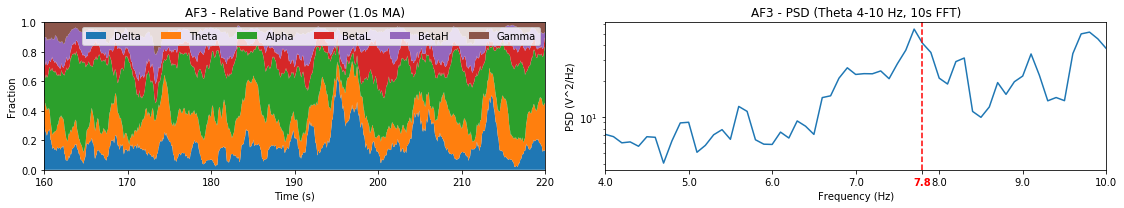

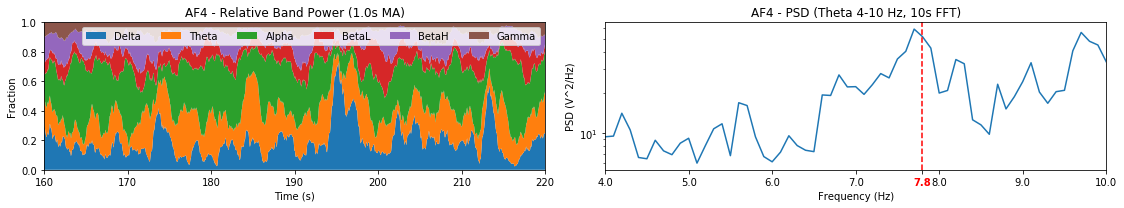

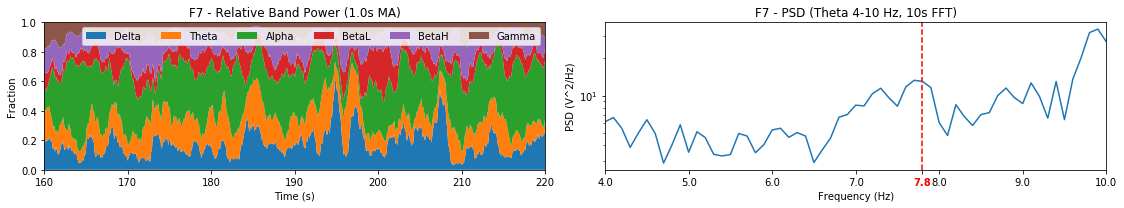

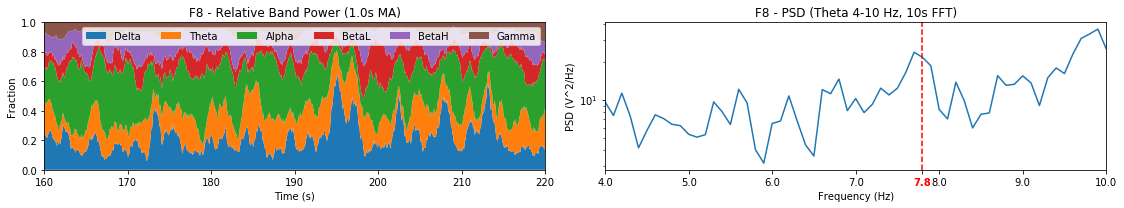

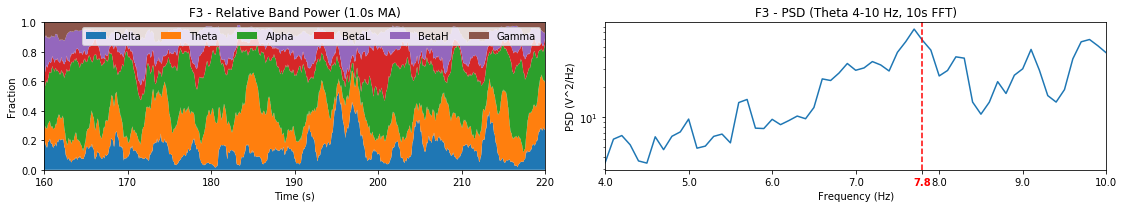

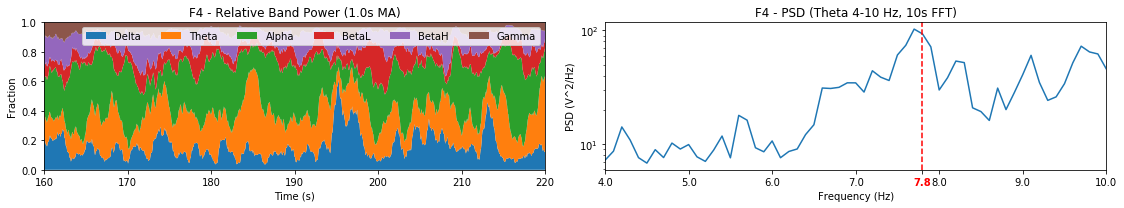

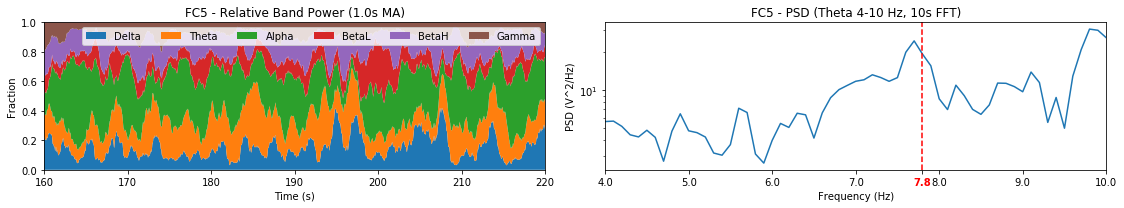

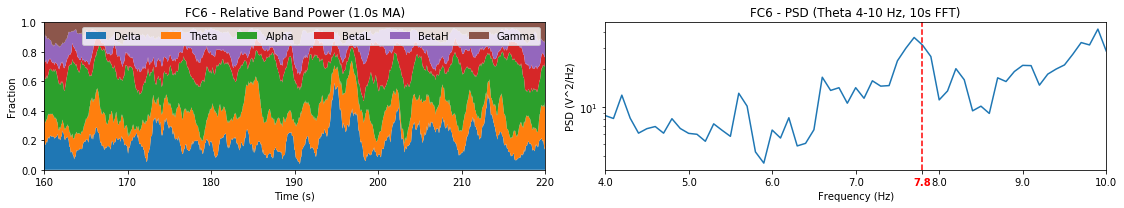

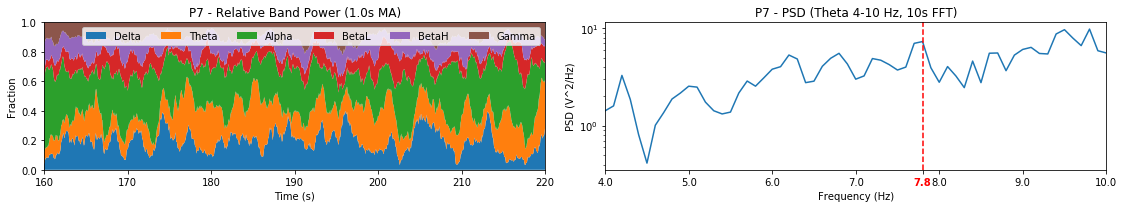

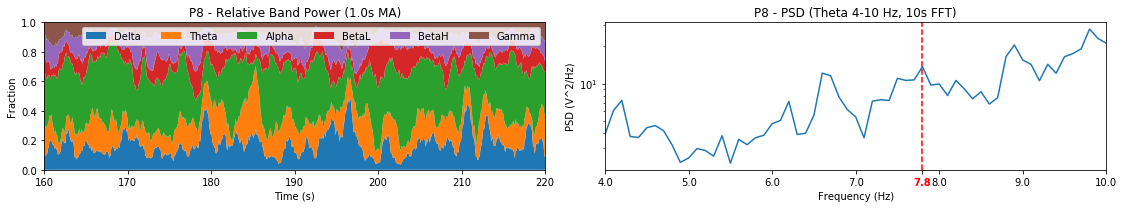

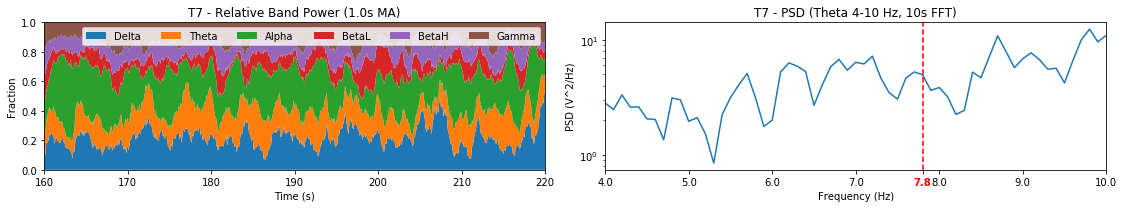

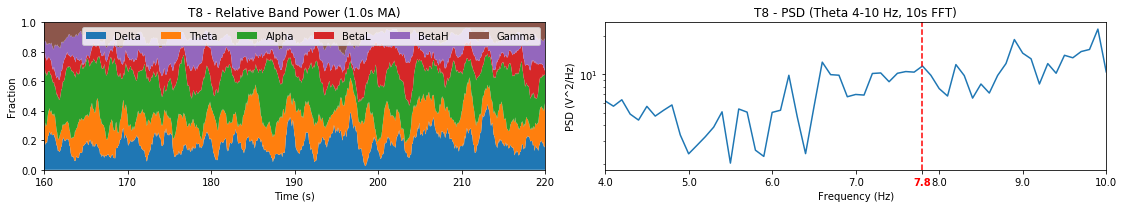

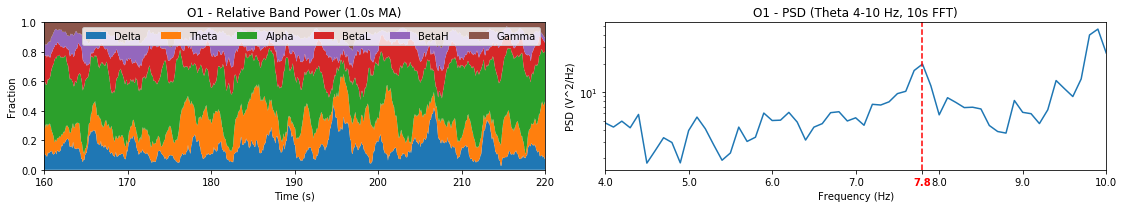

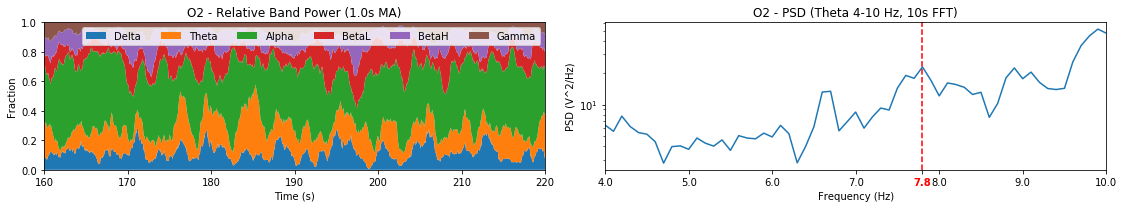

In [4]:
utilities.plot_stacked_relpower_timeseries(
    RECORDS,ELECTRODES,
    start_sec=160, 
    end_sec=220, 
    smooth_sec=1.0, 
    psd_fft_win=10
)

# Individual Alpha Frequency (IAF)

In [5]:
# --- Example usage (uncomment and adjust your variables) ---
iaf_results, iaf_summary = utilities.compute_iaf(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=180,
    end_sec=200,
    alpha_band=(7.0, 13.0),
    roi=("O1","O2","F3","F4","P7","P8"),
    psd_fft_win=10.0,
    psd_overlap=0.1,
    smooth_hz=0.1,
)
display(iaf_results)
print(iaf_summary)

,electrode,PAF_Hz,CoG_Hz,alpha_power
0,AF3,7.7,8.750627,166.512932
1,AF4,7.8,8.686384,182.611381
2,F7,7.3,9.134896,83.852915
3,F8,7.8,9.020431,101.246403
4,F3,7.7,8.511908,209.388428
5,F4,7.8,8.450644,292.456748
6,FC5,7.7,8.854006,95.881375
7,FC6,7.7,8.744505,137.284892
8,P7,7.7,9.026772,23.605550
9,P8,7.8,9.327374,75.485869


{'ROI_electrodes_used': ['F3', 'F4', 'P7', 'P8', 'O1', 'O2'], 'PAF_median_Hz': 7.75, 'PAF_mean_Hz': 7.75, 'CoG_median_Hz': 9.177073078835393, 'CoG_mean_Hz': 9.057122586086253}


# Animate Theta/Alpha PSD

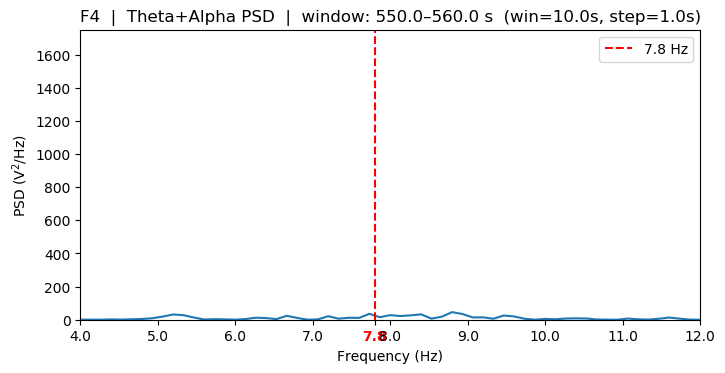

In [6]:
# --- Example usage (per electrode) ---
for electrode in ['F4']:
    anim = utilities.animate_theta_alpha_psd(
        df=RECORDS,
        electrode=electrode,
        fs=FS,
        start_sec=550,
        end_sec=580,
        win_sec=10,
        step_sec=1,
        psd_fft_win=7.5,
        psd_overlap=0.1,
        band=(4,12),
        dpi=100,
        show_legend=True,
        save_path=electrode+".gif"
    )
from IPython.display import HTML
HTML(anim.to_jshtml())

# Global Field Potential (GFP) - Theta/Alpha

""


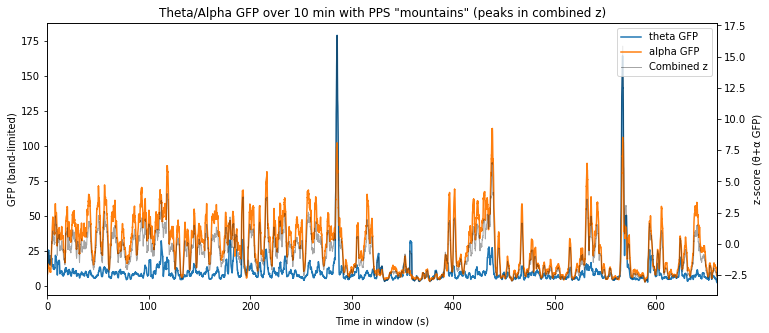

In [7]:
# Example usage (after RECORDS/ELECTRODES/FS are defined):
out = utilities.plot_pps_mountains(RECORDS, ELECTRODES, FS, start_sec=0, duration_sec=660,
                         bands=("theta","alpha"), smooth_sec=2.0,
                         baseline_first_sec=60, z_thresh=2.5,
                         prominence=0.5, min_width_sec=5, min_distance_sec=10,
                         use_existing_cols=True)
display(out['peaks'])

# (1/f) Aperiodic Slope

In [ ]:
utilities.plot_aperiodic_slope_timeseries(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=60,
    end_sec=660,
    win_sec=4.0,
    step_sec=2.0,
    fmin=1.0,
    fmax=45.0,
    exclude_bands_for_fit=((8,13),(18,25)),
    ylim=None,             # or e.g. (0.6, 2.0)
    figsize=(10, 2.2)      # height per subplot; total height = 2.2 * n_electrodes
)